### Campaign ROI Model

- Assumption: phone calls to leads are not independent and we treat this as a time series problem 

- Objective: create ML model to select target customers within customer segment as part of given campaign
- Customers are selected within the segment based on avg customer clv
- A higher avg customer clv will allow for a proportionally lower decision threshold, and viceversa
- Duration cannot be used

In [49]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [5]:
df = pd.read_pickle('data/data_ready.pickle')

In [4]:
y = df.y
duration = df.duration
df.drop(['y', 'duration'], axis=1, inplace=True)
X = df.copy()

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.33, 
                                                    random_state=2, 
                                                    shuffle = None)

In [15]:
print('X Train Shape: ', X_train.shape)
print('y Train Shape: ', y_train.shape)
print('X Test Shape: ', X_test.shape)
print('y Test Shape: ', y_test.shape)

X Train Shape:  (27595, 28)
y Train Shape:  (27595,)
X Test Shape:  (13593, 28)
y Test Shape:  (13593,)


In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
estimator = SGDClassifier()

In [18]:
#Evaluating both online SVM (hinge) and Logistic Regression (huber) 
#Notice target classes are highly imbalanced
param_search = {'loss' : ['hinge','huber'], 
                'alpha':[0.25,0.5,0.75], 
                'penalty':['l2'],
                'shuffle':[True], 
                'learning_rate':['optimal'],
                'class_weight':['balanced'],
                'verbose':[1], 
               'max_iter':[100], 
               'tol': [1e-3], 
               'random_state':[22]}

In [19]:
cv = TimeSeriesSplit(n_splits=2)

In [20]:
gs = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_search, scoring = 'accuracy')

In [21]:
gs.fit(X_train,y_train)

-- Epoch 1
Norm: 0.44, NNZs: 28, Bias: -0.384444, T: 9199, Avg. loss: 0.548898
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 28, Bias: -0.383742, T: 18398, Avg. loss: 0.532487
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.45, NNZs: 28, Bias: -0.373864, T: 27597, Avg. loss: 0.542197
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 28, Bias: -0.375940, T: 36796, Avg. loss: 0.540919
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 28, Bias: -0.370361, T: 45995, Avg. loss: 0.537397
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.45, NNZs: 28, Bias: -0.369908, T: 55194, Avg. loss: 0.541684
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 0.45, NNZs: 28, Bias: -0.367317, T: 64393, Avg. loss: 0.539294
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.44, NNZs: 28, Bias: -0.386728, T: 18397, Avg. loss: 0.547049
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 28, Bia

Norm: 0.15, NNZs: 28, Bias: -0.001612, T: 73588, Avg. loss: 0.087258
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.15, NNZs: 28, Bias: -0.002562, T: 91985, Avg. loss: 0.087162
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.15, NNZs: 28, Bias: -0.003300, T: 110382, Avg. loss: 0.087116
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.44, NNZs: 28, Bias: -0.382045, T: 27595, Avg. loss: 0.561674
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 28, Bias: -0.369329, T: 55190, Avg. loss: 0.544815
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.44, NNZs: 28, Bias: -0.368222, T: 82785, Avg. loss: 0.542201
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 28, Bias: -0.370735, T: 110380, Avg. loss: 0.545668
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 28, Bias: -0.364369, T: 137975, Avg. loss: 0.544191
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.45, NNZs: 28, Bias: -0.3

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
       error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['hinge', 'huber'], 'alpha': [0.25, 0.5, 0.75], 'penalty': ['l2'], 'shuffle': [True], 'learning_rate': ['optimal'], 'class_weight': ['balanced'], 'verbose': [1], 'max_iter': [100], 'tol': [0.001], 'random_state': [22]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
print('Best Estimator Hyperparameters:')
gs.best_estimator_

Best Estimator Hyperparameters:


SGDClassifier(alpha=0.25, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=22, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [23]:
#Predicting on Test set
y_pred = gs.best_estimator_.predict(X_test)

In [24]:
print('Accuracy on Test Set:', accuracy_score(y_test,y_pred))

Accuracy on Test Set: 0.7180166262046641


In [ ]:
#Creating methods to retrain and repredict with online learning algo on a rolling window basis:

In [119]:
def split_data(df, now):
    
    days_training = 21
    days_prediction = 7
    
    modeling_start_day = pd.Timestamp(now - timedelta(days=days_training))
    modeling_end_day = pd.Timestamp(now - timedelta(days=1))
    
    prediction_start_day = pd.Timestamp(now)
    prediction_end_day = pd.Timestamp(now + timedelta(days=days_prediction))
    
    modeling_set = df[(df.index > modeling_start_day) & (df.index < modeling_end_day)]
    prediction_set = df[(df.index > prediction_start_day) & (df.index < prediction_end_day)]
    
    return modeling_set, prediction_set

In [139]:
def data_prep(df):
    
    y = df.y.copy()
    duration = df.duration
    df.drop(['y', 'duration'], axis=1, inplace=True)
    X = df.copy()
    
    #X = np.array(X)
    #y = np.array(y)
    
    return X,y

In [121]:
def train_model(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.25, 
                                                    random_state=2, 
                                                    shuffle = None)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    estimator = SGDClassifier()
    
    #Evaluating both online SVM (hinge) and Logistic Regression (huber) 
    #Notice target classes are highly imbalanced
    param_search = {'loss' : ['hinge','huber'], 
                    'alpha':[0.25,0.5,0.75], 
                    'penalty':['l2'],
                    'shuffle':[True], 
                    'learning_rate':['optimal'],
                    'class_weight':['balanced'],
                    'verbose':[1], 
                    'max_iter':[100], 
                    'tol': [1e-3], 
                    'random_state':[22]}

    cv = TimeSeriesSplit(n_splits=2)
    
    gs = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_search, scoring = 'accuracy')
    
    gs.fit(X_train,y_train)
    
    print(gs.best_estimator_.coef_)
    
    #Predicting on Test set
    y_pred = gs.best_estimator_.predict(X_test)

    print('Accuracy on Test Set:', accuracy_score(y_test,y_pred))
    
    return gs.best_estimator_

In [147]:
def predict_online(X,y, best_estimator_):
    
    print('Chosen Estimator Coefficients:')
    print(best_estimator_.coef_)
    
    print('Chosen Estimator Hyperparameters:')
    print(best_estimator_)
    
    return best_estimator_.predict(X)

In [ ]:
##Steps:
#1 - split data after setting now (should set now on rolling window basis to demo entire thing)
#2 - data prep mod and pred datasets
#3 - train model with train_model with input mod dataset
#4 - predict with online_predict with input pred dataset

In [129]:
now = datetime.now() - timedelta(3600)

In [140]:
mod, pred = split_data(df, now)

In [141]:
X_mod, y_mod = data_prep(mod)
X_pred, y_pred = data_prep(pred)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [148]:
best_est = train_model(X_mod,y_mod)

-- Epoch 1
Norm: 0.92, NNZs: 24, Bias: 0.316905, T: 179, Avg. loss: 1.488864
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.64, NNZs: 24, Bias: 0.151976, T: 358, Avg. loss: 1.184963
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 24, Bias: 0.195289, T: 537, Avg. loss: 1.087385
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.65, NNZs: 24, Bias: 0.217886, T: 716, Avg. loss: 1.063068
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.68, NNZs: 24, Bias: 0.235409, T: 895, Avg. loss: 1.024222
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.68, NNZs: 24, Bias: 0.232876, T: 1074, Avg. loss: 1.122068
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.68, NNZs: 24, Bias: 0.230519, T: 1253, Avg. loss: 1.104401
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.66, NNZs: 24, Bias: 0.221458, T: 1432, Avg. loss: 1.089591
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.66, NNZs: 24, Bias: 0.228645, T: 1611, Avg. loss: 1.052587
Total training time: 0.

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [150]:
y_pred = predict_online(X_pred, y_pred, best_est)

Chosen Estimator Coefficients:
[[ 0.         -0.01324855  0.02413147 -0.00327032 -0.00510643  0.01099745
   0.02014456 -0.02087035  0.01430147 -0.01242296  0.00737951  0.01324855
   0.00380792 -0.00483253  0.00562529 -0.01283703  0.00945093 -0.00018139
  -0.01324855 -0.01324855 -0.00802273 -0.00018139 -0.0011292   0.01324855
   0.          0.          0.         -0.00402247]]
Chosen Estimator Hyperparameters:
SGDClassifier(alpha=0.75, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='huber', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=22, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=1, warm_start=False)


In [152]:
y_pred.shape

(1194,)

In [154]:
np.sum(y_pred == 0)

12

In [161]:
np.sum(df[(df.index < pd.Timestamp(now + timedelta(7))) & (df.index > pd.Timestamp(now))].y)

145

Include Tuning Functionality Here

Tune According to Campaign ROI as defined by differenced between avg loan and deposit interest rates and fixed/var campaign costs

In [42]:
clf = LogisticRegression(C=1, max_iter=100, class_weight = 'balanced')

In [43]:
clf.fit(X,y)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = clf.predict(X)

In [45]:
def make_conf_matrix(clf, X,y):
    y_pred = clf.predict(X)
    cmx = pd.DataFrame(confusion_matrix(y, y_pred), 
                   index = ['No', 'Yes'],
                   columns = ['No', 'Yes'])
    return cmx

In [46]:
def plot_conf_matrix(cmx):
    cmap = mpl.colors.ListedColormap(['green'])
    cmap1 = mpl.colors.ListedColormap(['red'])
    mask1 = (cmx.isin([cmx.iloc[0,0],cmx.iloc[1,1]]))
    
    f, ax = plt.subplots(figsize = (9,6))
    sns.heatmap(cmx, annot=True, fmt = 'g', cmap = cmap,
            cbar = False, annot_kws={"size": 20},
            ax=ax)
    sns.heatmap(cmx, mask=mask1 , cmap=cmap1, cbar=False)

    ax.set_ylabel('True label', fontsize = 15)
    ax.set_xlabel('Predicted label', fontsize = 15)
    ax.set_title("Confusion Matrix", fontsize = 20)
    plt.show()

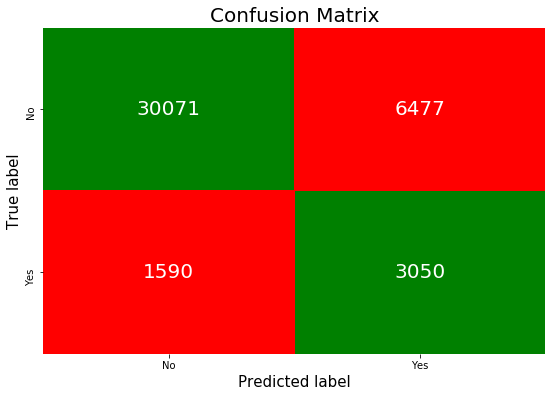

In [47]:
#Creating Confusion Matrix for Dirty Model:
cmx = make_conf_matrix(clf, X, y)
plot_conf_matrix(cmx)

In [48]:
print("Campaign Targets:", cmx.iloc[1,1]+cmx.iloc[0,1])

Campaign Targets: 9527


In [49]:
accept_est = cmx.iloc[1,1]
reject_est = cmx.iloc[0,1]
total_targeted = accept_est+reject_est

In [50]:
type(y)

pandas.core.series.Series

In [51]:
#enhancement: create rolling window logistic regression predicting next month's subscriptions

In [52]:
Xex = X[['year','month','age','job','marital']]

In [53]:
Xex.head()

year  month  age  job  marital
Date                                      
2008-05-05  2008      5   56    3        1
2008-05-05  2008      5   57    7        1
2008-05-05  2008      5   37    7        1
2008-05-05  2008      5   40    0        1
2008-05-05  2008      5   56    7        1

In [54]:
Xex.reset_index(drop=0, inplace=True)

In [56]:
y = y.reset_index(drop=1)

In [58]:
clf = LogisticRegression(solver='sag')

In [62]:
Xex.drop(columns='Date',inplace=True)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
clf.fit(Xex,y)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
clf.predict(np.array([1,2,3,1,1]).reshape(1,-1))

array([1], dtype=int8)

In [12]:
#for each value in decision threshold range, 
    #create logistic regression
    #calculate profit for campaign with average CLV for next x months
#select the logistic regression yielding the highest ROI

Campaign ROI Calculation

In [44]:
%store -r 'pred_clv'

In [49]:
customers_monthly = df[['year','month','day']].groupby(by=['year','month']).count()
customers_monthly = customers_monthly.reset_index()
customers_monthly.rename(columns = {'day':'count'},inplace=True)
customers_monthly.head()

year  month  count
0  2008      5   7763
1  2008      6   4374
2  2008      7   6685
3  2008      8   5175
4  2008     10     67

In [50]:
customers_monthly['perc_of_total'] = customers_monthly['count']/customers_monthly['count'].sum()

In [20]:
def calc_revenue(accept_est, pred_clv):
    return accept_est*pred_clv     

In [ ]:
#calculate revenue on a monthly basis comparing with predicted customer clv
#compare y with y pred and do a monthly classification matrix

In [53]:
revenue_est = calc_revenue(customers_monthly['count'], pred_clv)

ValueError: Length of passed values is 32, index implies 26

In [23]:
revenue_est

array([[446637.00753979],
       [501670.21111085],
       [601489.25756288],
       [581586.91486844],
       [618839.30795804],
       [657785.29383017],
       [668546.34464979],
       [602267.51151426],
       [433297.83443806],
       [522265.27937144],
       [562186.62036074],
       [390829.6445475 ],
       [468068.19524095]])

In [ ]:
def calc_